# **A/B testing - Compare Two Advertising Campaigns**

### Business Problem
The brand currently uses static images for advertising, but in an effort to increase profits and improve the effectiveness of their marketing campaign, the company has decided to switch to motion ads. The brand wants to determine whether this change will be beneficial for the business, specifically in terms of customer engagement, conversion rates, and sales growth. To achieve this, an A/B test will be conducted, comparing the performance of static images and motion ads across key metrics like click-through rates, conversions, and sales. The test results will help the company decide if this shift in advertising strategy will lead to a positive impact on profitability.

### Campaign Details:
- **Control Campaign.** Static ads with product images and messaging.
- **Test Campaign.** Video ads showcasing products in action.

### Business Objectives
**Primary Objective:** To determine if motion ads outperform static ads in driving higher customer engagement, increased conversion rates, and greater sales. <br/>
**Secondary Objectives:** To assess the overall impact of motion ads on brand awareness and customer retention compared to static ads. <br/>


### Business Goal
To optimize the brand’s advertising strategy by adopting the most effective ad format, leading to improved ROI, enhanced customer engagement, and increased profitability.

### Key Metrics
- Click-Through Rate
- Conversion Rate
- Cost Per Click
- Cost Per Thousand Impressions
- Cost Per Acquisation
- Click Rate
- Content-To-Cart Rate
- Cart Abandonment Rate
- Purchase Rate

### Duration
The A/B test will run for 30 daus to collect sufficient data and ensure statistically reliable results.

### Data review

In [1]:
# import libs

import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

In [2]:
df_control = pd.read_csv("control_group.csv", sep=";")
df_control.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_test =pd.read_csv("test_group.csv", sep=";")
df_test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [4]:
columns_names=["campaign name", "date", "amount spent", "impressions", "unique impressions", "clicks", "number of searches", "page views", "add to cart", "number of purchase"]
df_control.columns = columns_names
df_test.columns = columns_names

The dataset provides a mix of categorical and numerical attributes that capture campaign performance across various stages of the user journey - from visibility (impressions) to engagement (clicks) and conversion (purchases):

- **campaign name** specifies the type of ad;
- **date** records the date of the campaign data;
- **amount spent** represents the total monetary amount spent on the campaign for the given period;
- **impressions** total number of times the advertisement was displayed to users;
- **unique impressions** number of unique users who saw the advertisement;
- **clicks** total number of clicks on the advertisement;
- **number of searches** represents the number of users who performed a search after interacting with the ad;
- **page views** the total number of web pages viewed by users after clicking on the advertisement;
- **add to cart** the number of items users added to their shopping cart;
- **number of purchase** the total number of transactions completed by users;

In [5]:
df_control.info()
df_control.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign name       30 non-null     object 
 1   date                30 non-null     object 
 2   amount spent        30 non-null     int64  
 3   impressions         29 non-null     float64
 4   unique impressions  29 non-null     float64
 5   clicks              29 non-null     float64
 6   number of searches  29 non-null     float64
 7   page views          29 non-null     float64
 8   add to cart         29 non-null     float64
 9   number of purchase  29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


campaign name         0
date                  0
amount spent          0
impressions           1
unique impressions    1
clicks                1
number of searches    1
page views            1
add to cart           1
number of purchase    1
dtype: int64

In [6]:
df_test.info()
df_test.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   campaign name       30 non-null     object
 1   date                30 non-null     object
 2   amount spent        30 non-null     int64 
 3   impressions         30 non-null     int64 
 4   unique impressions  30 non-null     int64 
 5   clicks              30 non-null     int64 
 6   number of searches  30 non-null     int64 
 7   page views          30 non-null     int64 
 8   add to cart         30 non-null     int64 
 9   number of purchase  30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


campaign name         0
date                  0
amount spent          0
impressions           0
unique impressions    0
clicks                0
number of searches    0
page views            0
add to cart           0
number of purchase    0
dtype: int64

In [7]:
df_control.describe().T

,count,mean,std,min,25%,50%,75%,max
amount spent,30.0,2288.433333,367.334451,1757.0,1945.5,2299.5,2532.0,3083.0
impressions,29.0,109559.758621,21688.922908,71274.0,92029.0,113430.0,121332.0,145248.0
unique impressions,29.0,88844.931034,21832.349595,42859.0,74192.0,91579.0,102479.0,127852.0
clicks,29.0,5320.793103,1757.369003,2277.0,4085.0,5224.0,6628.0,8137.0
number of searches,29.0,2221.310345,866.089368,1001.0,1615.0,2390.0,2711.0,4891.0
page views,29.0,1943.793103,777.545469,848.0,1249.0,1984.0,2421.0,4219.0
add to cart,29.0,1300.000000,407.457973,442.0,930.0,1339.0,1641.0,1913.0
number of purchase,29.0,522.793103,185.028642,222.0,372.0,501.0,670.0,800.0


In [8]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
amount spent,30.0,2563.066667,348.687681,1968.0,2324.50,2584.0,2836.25,3112.0
impressions,30.0,74584.800000,32121.377422,22521.0,47541.25,68853.5,99500.00,133771.0
unique impressions,30.0,53491.566667,28795.775752,10598.0,31516.25,44219.5,78778.75,109834.0
clicks,30.0,6032.333333,1708.567263,3038.0,4407.00,6242.5,7604.75,8264.0
number of searches,30.0,2418.966667,388.742312,1854.0,2043.00,2395.5,2801.25,2978.0
page views,30.0,1858.000000,597.654669,858.0,1320.00,1881.0,2412.00,2801.0
add to cart,30.0,881.533333,347.584248,278.0,582.50,974.0,1148.50,1391.0
number of purchase,30.0,521.233333,211.047745,238.0,298.00,500.0,701.00,890.0


Control Campaign spent less money but reached more people with its ads. Test Campaign spent more, but reached fewer people. Test Campaign got slightly more clicks and searches, while Control Campaign got more people to add items to their cart. Both campaigns had similar numbers of purchases, but Control Campaign was more consistent. <br> <br>
In short, Control Campaign was better at engaging people, while Test Campaign was more targeted.

In [9]:
df_control.iloc[:, 3:] = df_control.iloc[:, 3:].fillna(df_control.iloc[:, 3:].median())
for col in df_control.columns[3:]:
    df_control[col] = df_control[col].round().astype('int64')

df_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   campaign name       30 non-null     object
 1   date                30 non-null     object
 2   amount spent        30 non-null     int64 
 3   impressions         30 non-null     int64 
 4   unique impressions  30 non-null     int64 
 5   clicks              30 non-null     int64 
 6   number of searches  30 non-null     int64 
 7   page views          30 non-null     int64 
 8   add to cart         30 non-null     int64 
 9   number of purchase  30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [10]:
print(df_control.duplicated().sum())
print(df_test.duplicated().sum())

0
0


### Marketing Funnel

In [11]:
control_camp = df_control[['impressions', 'clicks', 'add to cart', 'number of purchase']].sum()
control_camp = pd.DataFrame({
    'stage': control_camp.index,
    'number of actions': control_camp.values
})
control_camp['numberf'] = control_camp['number of actions'].apply(lambda x: f'{x:,.0f}')

control_camp

,stage,number of actions,numberf
0,impressions,3290663,"3,290,663"
1,clicks,159527,"159,527"
2,add to cart,39039,"39,039"
3,number of purchase,15662,"15,662"


In [12]:
test_camp = df_test[['impressions', 'clicks', 'add to cart', 'number of purchase']].sum()
test_camp = pd.DataFrame({
    'stage': test_camp.index,
    'number of actions': test_camp.values
})
test_camp['numberf'] = test_camp['number of actions'].apply(lambda x: f'{x:,.0f}')

test_camp

,stage,number of actions,numberf
0,impressions,2237544,"2,237,544"
1,clicks,180970,"180,970"
2,add to cart,26446,"26,446"
3,number of purchase,15637,"15,637"


In [13]:
fig = make_subplots(rows=1, cols=2, shared_yaxes=True)

fig.add_trace(go.Funnel(
    name = 'Contrrol Campaign',
    y = control_camp['stage'],
    x = control_camp['number of actions'],
    text = control_camp['numberf'],
    textposition = "auto",
    textinfo = "value+percent initial",
), row=1, col=1)

fig.add_trace(go.Funnel(
    name = 'Test Campaign',
    y = test_camp['stage'],
    x = test_camp['number of actions'],
    text = test_camp['numberf'],
    textposition = "auto",
), row=1, col=2)

fig.update_layout(
    title_text='Marketing Funnel',
    title_x=0.5,
    width=1000,
    height=500,
    margin=dict(l=20, r=30, t=50, b=50, pad=10)
)

fig.update_traces(
    textposition='auto', 
    texttemplate='%{text}', 
    textfont_size=15)

fig.show()

In [14]:
result = pd.merge(control_camp, 
                  test_camp, 
                  on='stage', 
                  suffixes=('_control', '_test'))

impressions_control = result[result['stage'] == 'impressions']['number of actions_control'].values[0]
impressions_test = result[result['stage'] == 'impressions']['number of actions_test'].values[0]

result['percentage_control'] = result['number of actions_control'] / impressions_control * 100
result['percentage_test'] = result['number of actions_test'] / impressions_test * 100

result['percentage_controlf'] = result['percentage_control'].apply(lambda x: f'{x:.2f}%')
result['percentage_testf'] = result['percentage_test'].apply(lambda x: f'{x:.2f}%')

result[['stage', 'numberf_control', 'numberf_test', 'percentage_controlf', 'percentage_testf']]


,stage,numberf_control,numberf_test,percentage_controlf,percentage_testf
0,impressions,"3,290,663","2,237,544",100.00%,100.00%
1,clicks,"159,527","180,970",4.85%,8.09%
2,add to cart,"39,039","26,446",1.19%,1.18%
3,number of purchase,"15,662","15,637",0.48%,0.70%


The test group demonstrates a higher click rate (8.09% compared to 5.02% in the control group), indicating more effective mechanisms for engaging users. However, at the "add to cart" stage, the test group slightly underperforms (1.18% compared to 1.23%), suggesting potential barriers in the conversion process after the click. This stage requires further analysis to identify factors influencing user decisions.

Despite this, the test group shows a higher purchase rate (0.70% compared to 0.49%), indicating improvements in the final stage of the funnel. This could result from optimized purchasing conditions, discounts, or other incentives. It is recommended to focus on resolving issues with the "add to cart" process and scaling the positive changes that led to the increase in purchases.

### Correlations

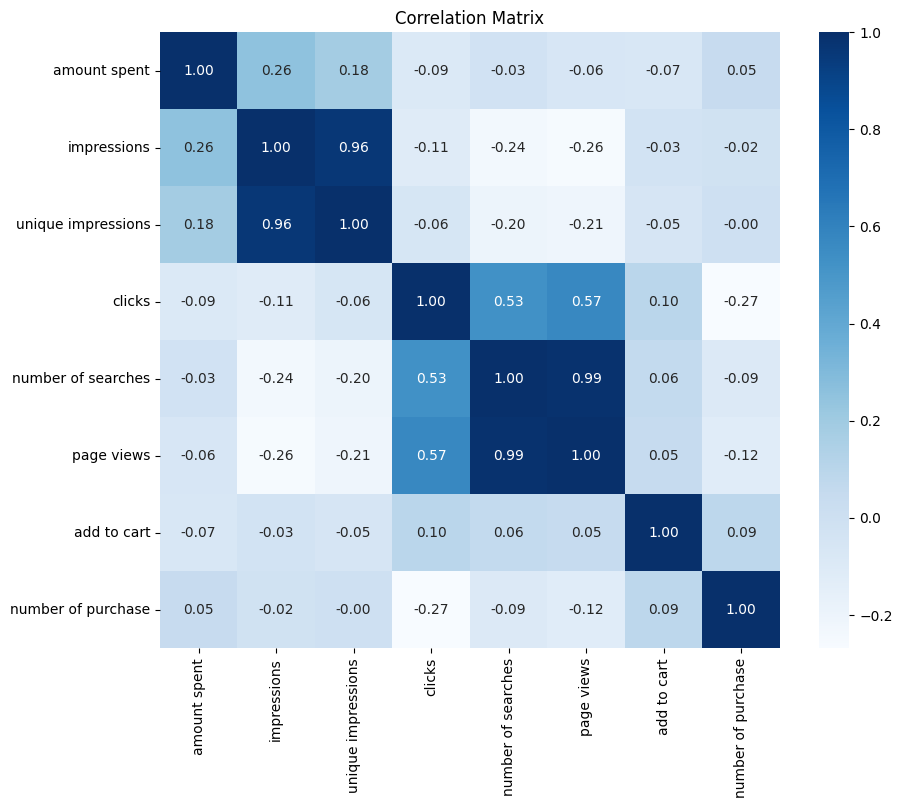

In [15]:
correlation_matrix = df_control.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

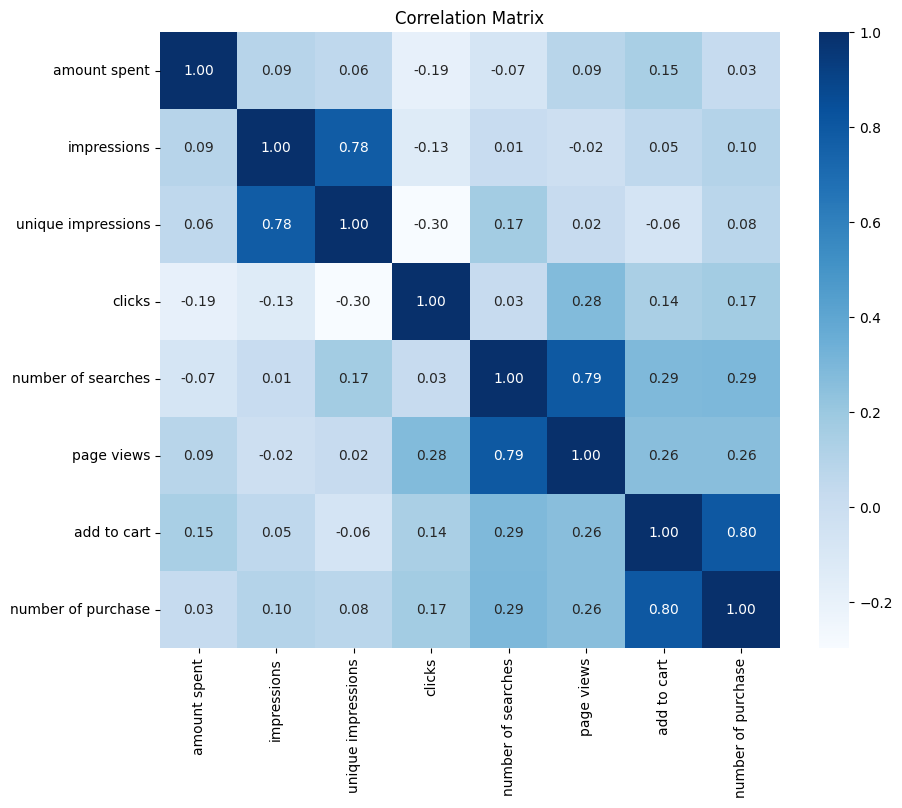

In [16]:
correlation_matrix = df_test.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

### Compare Two Samples

In [17]:
df = pd.concat([df_control, df_test])
df.head()

,campaign name,date,amount spent,impressions,unique impressions,clicks,number of searches,page views,add to cart,number of purchase
0,Control Campaign,1.08.2019,2280,82702,56930,7016,2290,2159,1819,618
1,Control Campaign,2.08.2019,1757,121040,102513,8110,2033,1841,1219,511
2,Control Campaign,3.08.2019,2343,131711,110862,6508,1737,1549,1134,372
3,Control Campaign,4.08.2019,1940,72878,61235,3065,1042,982,1183,340
4,Control Campaign,5.08.2019,1835,113430,91579,5224,2390,1984,1339,501


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 29
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   campaign name       60 non-null     object
 1   date                60 non-null     object
 2   amount spent        60 non-null     int64 
 3   impressions         60 non-null     int64 
 4   unique impressions  60 non-null     int64 
 5   clicks              60 non-null     int64 
 6   number of searches  60 non-null     int64 
 7   page views          60 non-null     int64 
 8   add to cart         60 non-null     int64 
 9   number of purchase  60 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 5.2+ KB


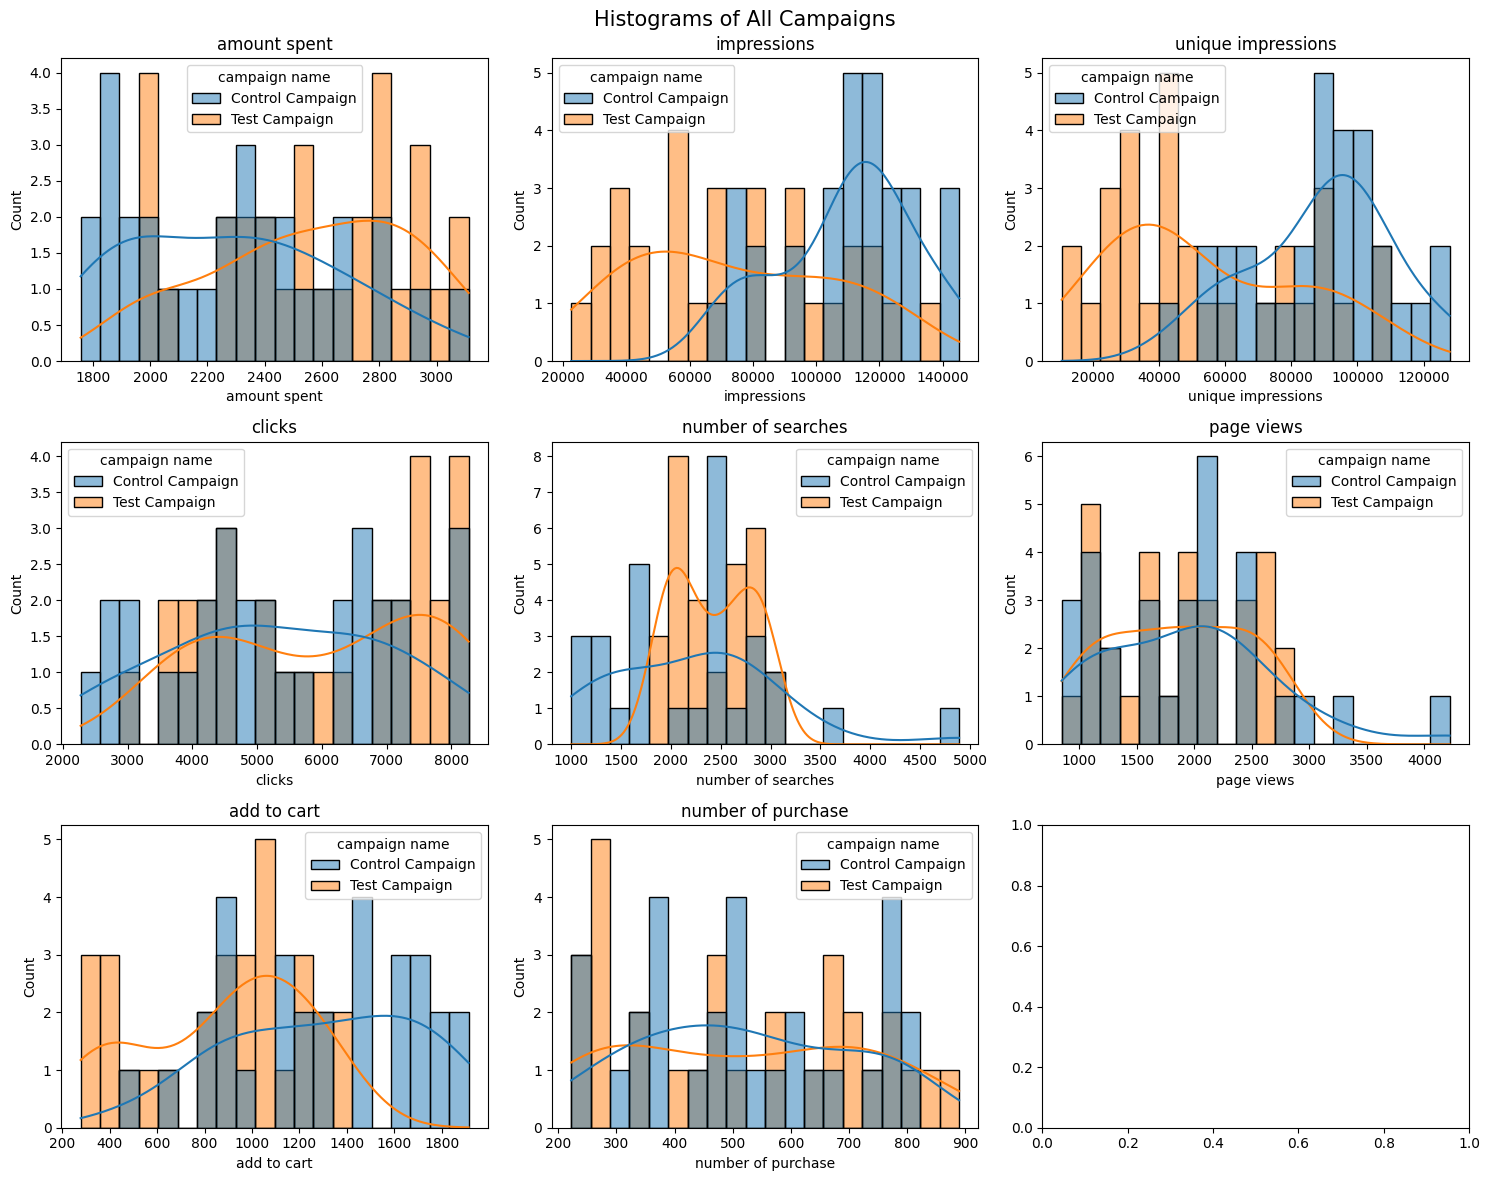

In [19]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12), dpi=100)

for i, col in enumerate(df.columns[2:], 1):
    if col != 'campaign name':
        plt.subplot(3, 3, i)
    
        sns.histplot(data=df, x=col, bins=20, hue='campaign name', kde=True)
        plt.title(f'{col}')

plt.suptitle('Histograms of All Campaigns', fontsize=15)
plt.tight_layout()
plt.show()

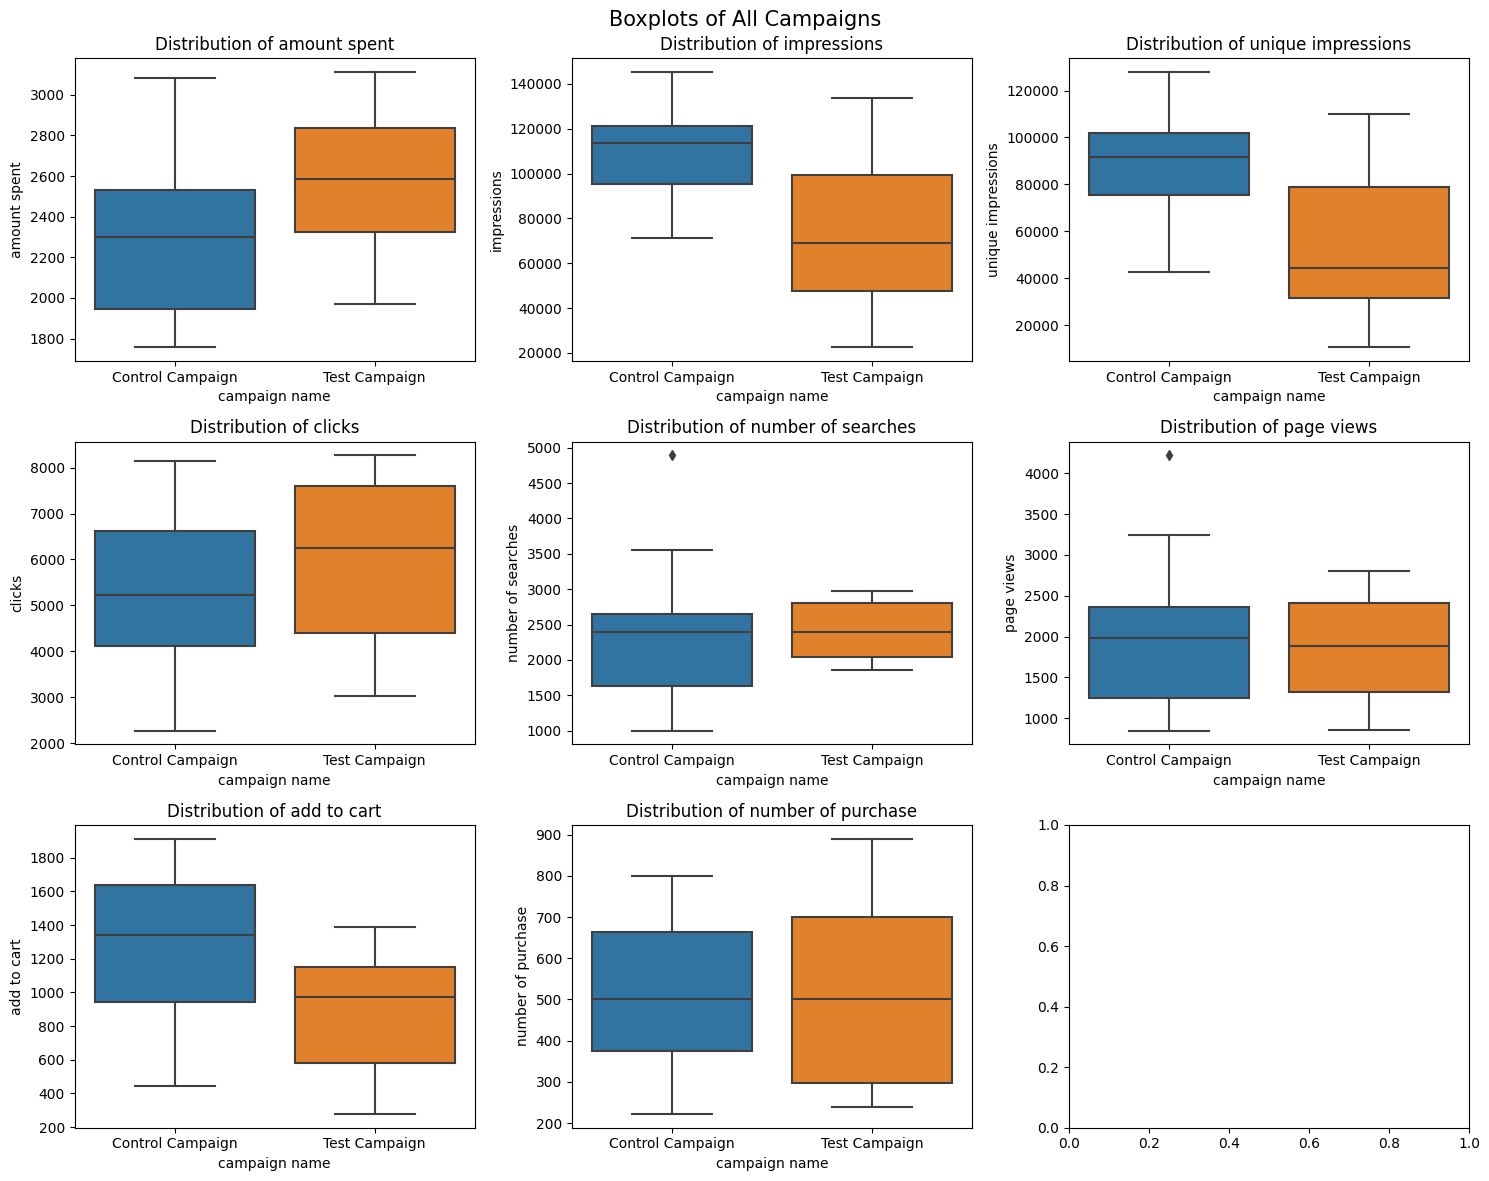

In [20]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

for i, col in enumerate(df.columns[2:],1):

    if col != 'Date':
        ax = plt.subplot(3, 3, i)
        sns.boxplot(data=df, x='campaign name', 
                    y=col, hue='campaign name', dodge=False)
        ax.set_title(f'Distribution of {col}')
        plt.legend().remove()

plt.suptitle('Boxplots of All Campaigns', fontsize=15)

plt.tight_layout()
plt.show()

### Feature creation

In [21]:
df['CTR'] = df['clicks'] / df['impressions'] * 100
df['CR'] = df['number of purchase'] / df['clicks'] * 100
df['CPC'] = df['amount spent'] / df['clicks']
df['CPM'] = (df['amount spent'] / df['impressions']) * 1000
df['CPA'] = df['amount spent'] / df['number of purchase']
df['Click Rate'] = df['clicks'] / df['unique impressions'] * 100
df['Content-to-Cart Rate'] = df['add to cart'] / df['page views'] * 100
df['Cart Abandonment Rate'] = (df['add to cart'] - df['number of purchase']) / df['add to cart'] * 100
df['Purchase Rate'] = df['number of purchase'] / df['impressions'] * 100
df.head()

,campaign name,date,amount spent,impressions,unique impressions,clicks,number of searches,page views,add to cart,number of purchase,CTR,CR,CPC,CPM,CPA,Click Rate,Content-to-Cart Rate,Cart Abandonment Rate,Purchase Rate
0,Control Campaign,1.08.2019,2280,82702,56930,7016,2290,2159,1819,618,8.483471,8.808438,0.324971,27.568862,3.689320,12.323907,84.251969,66.025289,0.747261
1,Control Campaign,2.08.2019,1757,121040,102513,8110,2033,1841,1219,511,6.700264,6.300863,0.216646,14.515863,3.438356,7.911192,66.214014,58.080394,0.422174
2,Control Campaign,3.08.2019,2343,131711,110862,6508,1737,1549,1134,372,4.941121,5.716042,0.360018,17.788947,6.298387,5.870361,73.208522,67.195767,0.282437
3,Control Campaign,4.08.2019,1940,72878,61235,3065,1042,982,1183,340,4.205659,11.092985,0.632953,26.619830,5.705882,5.005307,120.468432,71.259510,0.466533
4,Control Campaign,5.08.2019,1835,113430,91579,5224,2390,1984,1339,501,4.605484,9.590352,0.351263,16.177378,3.662675,5.704365,67.489919,62.584018,0.441682


In [22]:
campaign_means = df.drop(columns='date').groupby('campaign name').mean().reset_index()
campaign_means

,campaign name,amount spent,impressions,unique impressions,clicks,number of searches,page views,add to cart,number of purchase,CTR,CR,CPC,CPM,CPA,Click Rate,Content-to-Cart Rate,Cart Abandonment Rate,Purchase Rate
0,Control Campaign,2288.433333,109688.766667,88936.066667,5317.566667,2226.933333,1945.133333,1301.300000,522.066667,5.079525,11.414308,0.490120,21.531100,5.006017,6.424110,77.442171,54.558879,0.498137
1,Test Campaign,2563.066667,74584.800000,53491.566667,6032.333333,2418.966667,1858.000000,881.533333,521.233333,10.242260,9.231182,0.468718,42.681041,5.899589,17.408847,51.509579,38.205134,0.842521


### Analysis of the Control and Test Campaigns
- The test campaign spent more money compared to the control campaign.
- The control campaign had significantly more impressions, meaning it reached a larger audience.
- Again, the control campaign reached more unique individuals, while the test campaign had fewer unique impressions.
- The test campaign generated more clicks, indicating better user engagement.
- The test campaign also generated more searches, which may indicate more interest in the brand.
- The control campaign had slightly more page views, although the difference is small.
- The control campaign led to more "Add to Cart" actions, suggesting higher customer intent.
- The number of purchases is almost identical, showing similar conversion performance.

Key Metrics
- The test campaign had a significantly higher CTR, suggesting that the motion ads (test) were more effective at attracting clicks.
- The control campaign had a higher conversion rate, meaning that more people who clicked the ad completed a purchase in the control campaign.
- The test campaign had a slightly lower cost per click, indicating it was more cost-efficient in driving traffic.
- The control campaign was much more cost-effective in terms of impressions, as the test campaign's CPM is nearly double.
- The cost per acquisition was slightly higher in the test campaign, indicating it cost more to acquire a customer through motion ads.
- The test campaign had a higher click rate, indicating better user interaction.
- The control campaign had a much higher content-to-cart rate, suggesting that users were more likely to add items to their cart after interacting with the ad.
- The test campaign had a lower cart abandonment rate, suggesting that users who added items to their cart in the test campaign were more likely to complete the purchase.

**Effectiveness** <br>
The test campaign (motion ads) drove more clicks and had a higher CTR, but the control campaign (static ads) had a better conversion rate and was more efficient in terms of cost per impression and acquisition. <br><br>
**User Engagement** <br> 
The test campaign had better engagement metrics (clicks, searches), but the control campaign performed better in terms of "Add to Cart" actions and final purchases. <br><br>
**Cost Efficiency** <br>
The control campaign was more cost-efficient, especially regarding impressions, but the test campaign had a lower CPC. <br>

**Overall** <br>
While the test campaign showed better engagement, the control campaign had higher conversion rates and was more cost-effective, leading to similar purchase results despite the higher spending.

### Hypothesis Tests
**Null Hypothesis H0:** <br>
There is no statistically significant difference between Control and Test Campaigns.

**Alternative Hypothesis H1:** <br>
There is statistically significant difference between Control and Test Campaigns.

In [23]:
features = ["CTR", "CR", "CPC", "CPM", "CPA", "Click Rate", "Content-to-Cart Rate", "Cart Abandonment Rate", "Purchase Rate"]

#### Checking normality by Shapiro test

In [24]:
def shapiro_test(data, features):
    results = {'Feature': [], 'Shapiro_Statistic': [], 'p_value': [], 'Normality': []}

    for feature in features:
        statistic, p_value = shapiro(data[feature])
        results['Feature'].append(feature)
        results['Shapiro_Statistic'].append(statistic)
        results['p_value'].append(p_value)
        if p_value < 0.05:
            results['Normality'].append('Not Normal')
        else:
            results['Normality'].append('Normal')

    results_df = pd.DataFrame(results)
    results_df['p_value'] = results_df['p_value'].apply(lambda x: round(x, 6))
    return results_df

In [25]:
results_a = shapiro_test(df[df['campaign name'] == 'Control Campaign'], features)
results_a

,Feature,Shapiro_Statistic,p_value,Normality
0,CTR,0.956869,0.257099,Normal
1,CR,0.892540,0.005545,Not Normal
2,CPC,0.869366,0.001622,Not Normal
3,CPM,0.965422,0.422583,Normal
4,CPA,0.906118,0.011892,Not Normal
5,Click Rate,0.941383,0.099109,Normal
6,Content-to-Cart Rate,0.908837,0.013910,Not Normal
7,Cart Abandonment Rate,0.796201,0.000056,Not Normal
8,Purchase Rate,0.956309,0.248567,Normal


In [26]:
results_b = shapiro_test(df[df['campaign name'] == 'Test Campaign'], features)
results_b

,Feature,Shapiro_Statistic,p_value,Normality
0,CTR,0.840918,0.000403,Not Normal
1,CR,0.925469,0.037268,Not Normal
2,CPC,0.911448,0.016188,Not Normal
3,CPM,0.848552,0.000578,Not Normal
4,CPA,0.896580,0.006934,Not Normal
5,Click Rate,0.667670,0.000001,Not Normal
6,Content-to-Cart Rate,0.972907,0.621365,Normal
7,Cart Abandonment Rate,0.977258,0.748913,Normal
8,Purchase Rate,0.883848,0.003459,Not Normal


#### Mann-Whitney U Test

In [27]:
results = {}
metrics = ["CTR", "CR", "CPC", "CPM", "CPA", "Click Rate", "Purchase Rate"]
for metric in features:
    control = df[df['campaign name'] == 'Control Campaign'][metric]
    test = df[df['campaign name'] == 'Test Campaign'][metric]
    stat, p = mannwhitneyu(control, test)
    results[metric] = {'p-value': p}

ht_df = pd.DataFrame(results).T
ht_df['p-value'] = ht_df['p-value'].apply(lambda x: round(x, 4))
alpha = 0.05

ht_df['Conclusion'] = ht_df['p-value'].apply(lambda p: 'Significant difference (Reject H0)' if p < alpha else 'No significant difference (Fail to reject H0)')
ht_df


,p-value,Conclusion
CTR,0.0002,Significant difference (Reject H0)
CR,0.2838,No significant difference (Fail to reject H0)
CPC,0.8766,No significant difference (Fail to reject H0)
CPM,0.0000,Significant difference (Reject H0)
CPA,0.2340,No significant difference (Fail to reject H0)
Click Rate,0.0000,Significant difference (Reject H0)
Content-to-Cart Rate,0.0080,Significant difference (Reject H0)
Cart Abandonment Rate,0.0001,Significant difference (Reject H0)
Purchase Rate,0.0033,Significant difference (Reject H0)


#### Two-Sample t-Test

In [28]:
results = {}
metrics = ["Content-to-Cart Rate", "Cart Abandonment Rate"]
for metric in features:
    control = df[df['campaign name'] == 'Control Campaign'][metric]
    test = df[df['campaign name'] == 'Test Campaign'][metric]
    stat, p = ttest_ind(control, test, alternative='two-sided')
    results[metric] = {'p-value': p}

ht_df = pd.DataFrame(results).T
ht_df['p-value'] = ht_df['p-value'].apply(lambda x: round(x, 4))
ht_df['Conclusion'] = ht_df['p-value'].apply(lambda p: 'Significant difference (Reject H0)' if p < alpha else 'No significant difference (Fail to reject H0)')
ht_df

,p-value,Conclusion
CTR,0.0002,Significant difference (Reject H0)
CR,0.1436,No significant difference (Fail to reject H0)
CPC,0.6796,No significant difference (Fail to reject H0)
CPM,0.0000,Significant difference (Reject H0)
CPA,0.1671,No significant difference (Fail to reject H0)
Click Rate,0.0011,Significant difference (Reject H0)
Content-to-Cart Rate,0.0040,Significant difference (Reject H0)
Cart Abandonment Rate,0.0056,Significant difference (Reject H0)
Purchase Rate,0.0014,Significant difference (Reject H0)


The control campaign performed better in terms of conversion-related metrics (Content-to-Cart Rate and Purchase Rate), while the test campaign (motion ads) was more effective in terms of engagement (CTR and Click Rate) and had lower cart abandonment. However, for Cost-related metrics (CPC and CPA), there was no significant difference between the campaigns.

The test campaign has shown that the Cost per Mille (CPM), or the cost to get 1000 impressions, is higher compared to the control campaign, making the test slightly more expensive in terms of impressions. However, the Cost per Click (CPC) has not shown significant differences between the two campaigns. In terms of campaign effectiveness, the click-through rate (CTR) has seen a significant improvement in the test campaign, demonstrating a better conversion of impressions into clicks. Similarly, the reach-to-click ratio has improved, with more unique users visiting the site, which is a positive outcome. On the downside, the content-viewed-to-add-to-cart ratio has decreased, suggesting that changes on the content page may not have been as effective. However, the cart abandonment rate has reduced, indicating that customers who add items to their cart are now more likely to complete a purchase. Additionally, the purchase rate has increased from impression to purchase, meaning users exposed to the ads in the test campaign are more likely to make a purchase.

### Conclusion
Based on the A/B test results, it is recommended to introduce the new type of advertising (motion ads). The motion ads demonstrated significantly higher engagement (CTR, Click Rate) and purchase-related metrics (Purchase Rate, Content-to-Cart Rate), suggesting they are more effective in capturing user attention and driving conversions.